# Modelling

This notebook tests and describes the procedure to model the data

## Preamble

In [16]:
# load basic libraries
import numpy as np
import os
import sys
import re
import pandas as pd
from importlib import reload

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# add ./python to python path
sys.path.insert(0, '../python')

# load local libraries
import cleaning
import text_processing
import modelling

## Options

In [17]:
# options
data_dir = '../0_data'

plt.style.use('seaborn-whitegrid')

plt.rc('pdf', fonttype=42)
sns.mpl.rc('figure', figsize = (10, 8))
sns.set_context('notebook', font_scale=2.0, rc={'lines.linewidth': 2.5})

pd.set_option('display.max_columns', 500)

## Data modelling

In [430]:
reload(modelling)

# create cleaner object
model = modelling.Modelling()

# read the data
model.read(data_dir+'/23-08-2018/clean.csv')

Reading file...done (found 98547 NOTAMs).


In [4]:
df = model.get_df()
df.head()

,folder_id,keyvalue,cat_id,svt,evt,validfromt,validtot,profcat,active,dataclass,...,radius,severity,last_modified_dt,EstimatedEvt,item_id_1,fulltext,txt_id,HEX(id),text,text_clean
item_id,,,,,,,,,,,,,,,,,,,,,
4665277,-1,XXXX,5,2018-07-01 22:34:00.000,2018-07-31 23:59:00.000,0,0,2,1,TXT,...,27,0,NaN,NaN,4665277,A3621/18 NOTAMN Q)MMFR/QRRCA/IV/BO/W/000/185/1...,11,0x00003F3F,"ACT MIL AREAS MMR-116, MMR-117 AND MMR-119",act mil areas mmr <num> mmr <num> and mmr <num>
4665276,-1,XXXX,5,2018-07-01 07:00:00.000,2018-07-01 15:30:00.000,0,0,2,1,TXT,...,42,0,NaN,NaN,4665276,A3657/18 NOTAMN Q)LTXX/QWELW/IV/BO/W/300/300/3...,11,0x00003F3F,AIRBORNE WARNING AND CONTROL SYSTEM FLIGHT WIL...,airborne warning and ctl system flight will ta...
4665275,-1,XXXX,5,2018-07-01 07:00:00.000,2018-07-01 15:30:00.000,0,0,2,1,TXT,...,42,0,NaN,NaN,4665275,G4732/18 NOTAMN Q)LTXX/QWELW/IV/BO/W/300/300/3...,11,0x00003F3F,AWACS/HIK UCUSU YAPILACAKTIR. SAHA:362500N0303...,awacs/hik ucusu yapilacaktir saha <coord> <co...
4665274,-1,XXXX,5,2018-07-01 00:00:00.000,2018-07-31 23:59:00.000,0,0,2,1,TXT,...,2,0,NaN,NaN,4665274,A3620/18 NOTAMN Q)MMFR/QRRCA/IV/BO/W/000/010/1...,11,0x00003F3F,RESTRICTED AREA LATERAL LIMIT: CIRCLE OF 2...,restricted area lateral limit circle of <num>...
4665273,-1,XXXX,3,2018-07-01 01:15:00.000,2018-07-01 04:00:00.000,0,0,2,1,TXT,...,5,0,NaN,NaN,4665273,A3566/18 NOTAMN Q)EDWW/QFALC/IV/NBO/A/000/999/...,11,0x00003F3F,AERODROME CLSD EXCEPT HELIPADS.,aerodrome clsd exc helipads


In [73]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=100)

from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()

In [74]:
corpus = df['text_clean'].fillna('').values

In [85]:
counts = vectorizer.fit_transform(corpus)
X_sparse = transformer.fit_transform(counts)
# X_sparse = counts
X = X_sparse.toarray()

In [222]:
choice = np.random.randint(X.shape[0], size=5000)
X_small = X[choice, :]
y_small = df['supress'].values[choice]

In [223]:
#text_small = df['fulltext'].values[choice]
#text_small

In [244]:
def break_lines(input_text, stride=60):
    """Break lines for a list of texts"""

    output_text = []
    for text in input_text:
        string = ''
        ids = range(0, len(text), stride)
        for start,end in zip(ids[:-1], ids[1:]):
            string += text[start: end]+'<br>'
        string += text[end:]

        output_text.append(string)
    
    return np.array(output_text)

text_small = break_lines(df['fulltext'].values[choice])

#text_small

#type(text_small)
#text_small

array(['J5283/18 NOTAMR J5268/18 Q)RJJJ/QANCA/I/NBO/E/000/999/3812N1<br>3646E242 A)RJJJ B)1806290528 C)1806292100 E)REF AIP ENR 3.3 <br>CDR ARE ESTABLISHED AS FLW,     RTE         PERIOD          <br>       MNM APPLICABLE ALT 1)  Z16         1806291300/1806292<br>100  MEA 2)  Z17         1806291300/1806292100  MEA 3)  Z18 <br>        1806290800/1806292100  MEA 4)  Z21         180629080<br>0/1806292100  MEA 5)  Z162        1806290800/1806292100  MEA<br> 6)  Z171        1806290800/1806292100  MEA 7)  Z182        <br>1806290800/1806292100  MEA',
       'A1169/18 NOTAMN Q)PHZH/QMXHW/IV/M/A/000/999/2054N15626W005 A<br>)PHOG B)1806021030 C)1806021530 E)TWY E BTN RWY 02/20 AND EA<br>ST RAMP WIP SFC PAINTING',
       'M3749/18 NOTAMN Q)EBBU/QRTCA/IV/BO/W/095/999/5010N00455E039 <br>A)EBBU B)1806261300 C)1806280850 D)26 1300-1350, 28 0800-085<br>0 E)TEMPO SEGREGATED AREA EBTSA26A ARDENNES 01 ACTIVATED. -D<br>URING ACT EBTSA26A IS NOT PERMEABLE AND TG1 IS CLOSED. -GAT <br>TRAFFIC IS ALLOWED TO CR

In [225]:
# from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_small)

#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#X_embedded = pca.fit_transform(X_small)

X_embedded.shape

(5000, 2)

In [226]:
print(sum(X_small[0]))

1.6504895951782452


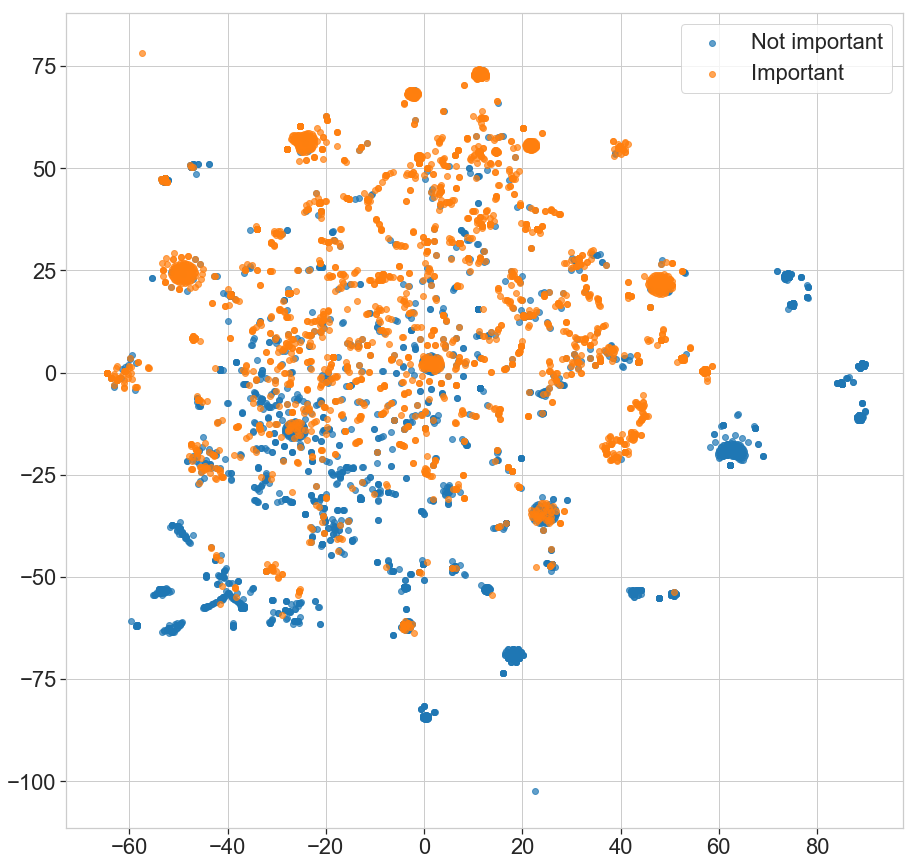

In [227]:
fig, ax = plt.subplots(figsize=(15, 15))
x = X_embedded[:, 0]
y = X_embedded[:, 1]


#z = X_embedded[:, 2]

sup = y_small == 1
ax.scatter(x[sup], y[sup], label='Not important', alpha=0.7)
ax.scatter(x[~sup], y[~sup], label='Important', alpha=0.7)
ax.legend(frameon=True)

In [94]:
import plotly
plotly.__version__

'3.2.1'

In [230]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

#plotly.offline.iplot({
#    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
#    "layout": go.Layout(title="hello world")
#})

trace0 = go.Scatter(
    x = x[sup],
    y = y[sup],
    #z = z[sup],

    name = 'Not important',
    mode = 'markers',
    marker = dict(
        size = 5,
    ),
    text = text_small[sup]
)

trace1 = go.Scatter(
    x = x[~sup],
    y = y[~sup],
    #z = z[sup],
    name = 'Important',
    mode = 'markers',
    marker = dict(
        size = 5,
    ),
    text = text_small[~sup]
)


data = [trace0, trace1]

layout= go.Layout(
    autosize=False,
    width=1000,
    height=1000,

    title= 'NOTAMs/t-SNE',
    hovermode= 'closest',
    xaxis= dict(
        title= 'x',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'y',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)


fig = dict(data=data, layout=layout)
#plotly.offline.iplot(fig)
plotly.offline.plot(fig, filename='NOTAM_t_SNE.html')


'file:///Users/coupon/projects/propulsion/Swiss/3_Modelling/NOTAM_t_SNE.html'

## Gensim

In [306]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim import corpora, models, similarities


# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in df['text_clean'].fillna('').values]


#models.TfidfModel


In [304]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(texts)]
#documents

In [425]:
model = models.doc2vec.Doc2Vec(vector_size=500, min_count=1, window=1)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

TypeError: initialize() missing 2 required positional arguments: 'self' and 'corpus'

In [429]:
models.TfidfModel(texts)

ValueError: too many values to unpack (expected 2)

In [419]:
vectors = np.zeros((len(documents), 500))
for i,t in enumerate(documents):
    vectors[i,:] = model.docvecs[i]
    
X = vectors


choice = np.random.randint(X.shape[0], size=5000)
X_small = X[choice, :]
y_small = df['supress'].values[choice]

#X_embedded = X_small

# from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_small)

#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#X_embedded = pca.fit_transform(X_small)

X_embedded.shape

(5000, 2)

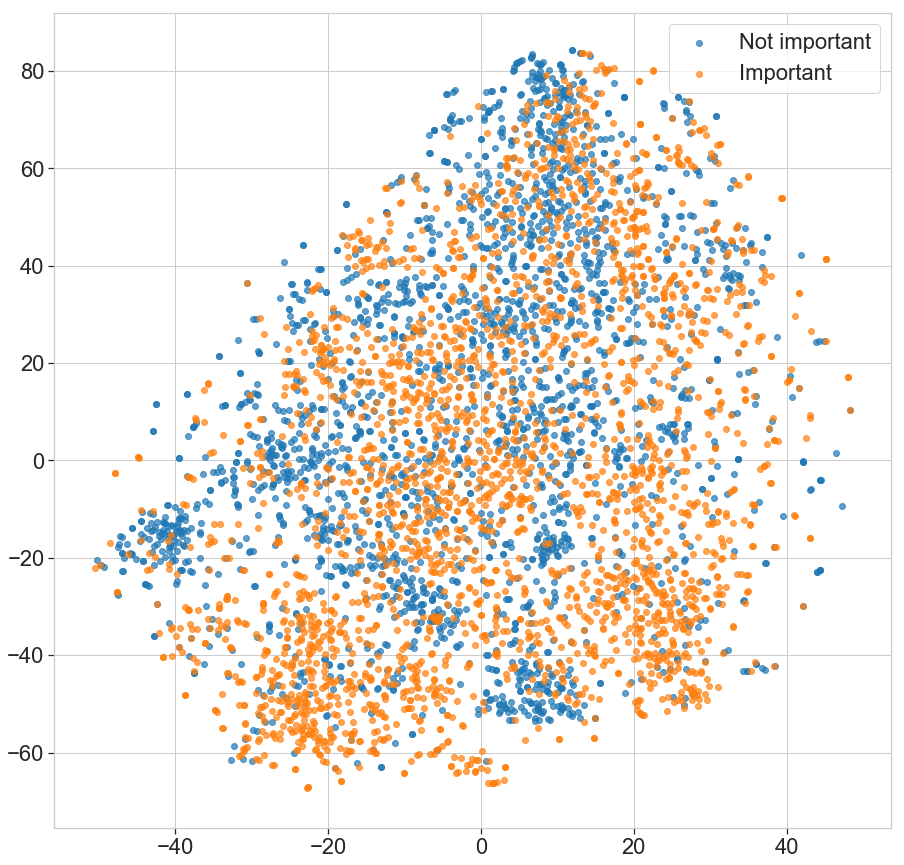

In [421]:
fig, ax = plt.subplots(figsize=(15, 15))
x = X_embedded[:, 0]
y = X_embedded[:, 1]

sup = y_small == 1
ax.scatter(x[sup], y[sup], label='Not important', alpha=0.7)
ax.scatter(x[~sup], y[~sup], label='Important', alpha=0.7)
ax.legend(frameon=True)

In [344]:
vec = documents[1].words
print(vec)

sims = model.docvecs.most_similar([model.docvecs[1]], topn=len(model.docvecs))

#print(sims[0][0])
print(documents[sims[4][0]])


['airborne', 'warning', 'ctl', 'system', 'flight', 'will', 'take', 'place', 'area', '<coord>', '<coord>', '<coord>', '<coord>']
TaggedDocument(['airborne', 'warning', 'ctl', 'system', 'will', 'take', 'place', 'area', '<coord>', '<coord>', '<coord>', '<coord>', 'area', 'clsd', 'tfc', 'btn', 'fl<num>', 'fl<num>'], [61654])


In [317]:
vectors = np.zeros((len(documents), 50))
for i,t in enumerate(documents):
    vectors[i,:] = model.infer_vector(t.words)
    
    
    #print( vectors[i,:])
    #break

In [258]:
# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in corpus]

# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
texts = [[token for token in text if frequency[token] > 1]
         for text in texts]

from pprint import pprint  # pretty-printer
#pprint(texts)

In [296]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(texts)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [298]:
vectors = np.zeros((len(texts), 5))
for i,t in enumerate(texts):
    vectors[i,:] = model.infer_vector(t)

In [ ]:
texts[10]

In [268]:


dictionary = corpora.Dictionary(texts)
#print(dictionary.token2id)

In [278]:
#corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [273]:
tfidf = models.TfidfModel(corpus)
tfidf

#index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=12)

In [282]:
tfidf[corpus[10]]

[(30, 0.06720827110149225),
 (77, 0.10703027966446861),
 (78, 0.24867227945645176),
 (79, 0.3455633128625216),
 (80, 0.1222257253141751),
 (81, 0.3656720578386301),
 (82, 0.32170026033756605),
 (83, 0.29888933903896886),
 (84, 0.09131788555010037),
 (85, 0.36831392715911954),
 (86, 0.12229327552443915),
 (87, 0.40419493285427227),
 (88, 0.3727885343122836)]

TypeError: 'int' object is not iterable

In [353]:
print(list(model.docvecs))

KeyError: "tag '98547' not seen in training corpus/invalid"

In [357]:
vectors = np.zeros((len(documents), 50))
for i,t in enumerate(documents):
    vectors[i,:] = model.docvecs[i]
    
X = vectors


choice = np.random.randint(X.shape[0], size=100)
X_small = X[choice, :]
y_small = df['supress'].values[choice]

# from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_small)

#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#X_embedded = pca.fit_transform(X_small)

X_embedded.shape

(100, 2)

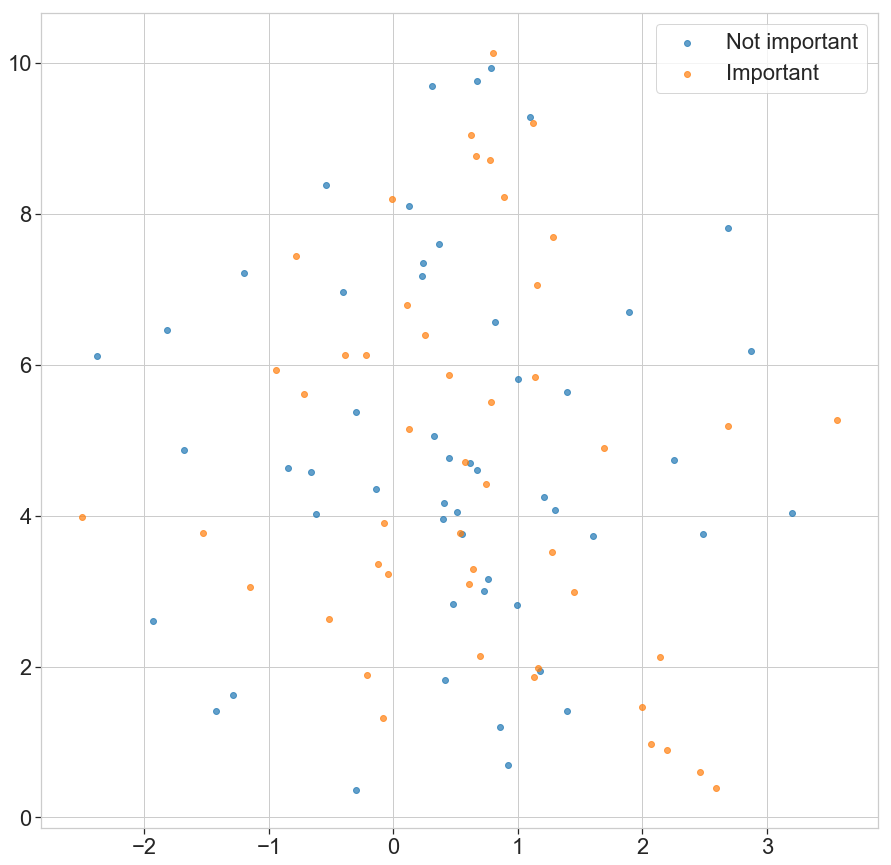

In [360]:
fig, ax = plt.subplots(figsize=(15, 15))
x = X_embedded[:, 0]
y = X_embedded[:, 1]

sup = y_small == 1
ax.scatter(x[sup], y[sup], label='Not important', alpha=0.7)
ax.scatter(x[~sup], y[~sup], label='Important', alpha=0.7)
ax.legend(frameon=True)

In [422]:
text_small = break_lines(df['fulltext'].values[choice])


plotly.offline.init_notebook_mode(connected=True)

#plotly.offline.iplot({
#    "data": [go.Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
#    "layout": go.Layout(title="hello world")
#})

trace0 = go.Scatter(
    x = x[sup],
    y = y[sup],
    #z = z[sup],

    name = 'Not important',
    mode = 'markers',
    marker = dict(
        size = 5,
    ),
    text = text_small[sup]
)

trace1 = go.Scatter(
    x = x[~sup],
    y = y[~sup],
    #z = z[sup],
    name = 'Important',
    mode = 'markers',
    marker = dict(
        size = 5,
    ),
    text = text_small[~sup]
)


data = [trace0, trace1]

layout= go.Layout(
    autosize=False,
    width=1000,
    height=1000,

    title= 'NOTAMs/t-SNE',
    hovermode= 'closest',
    xaxis= dict(
        title= 'x',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'y',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)


fig = dict(data=data, layout=layout)
#plotly.offline.iplot(fig)
plotly.offline.plot(fig, filename='NOTAM_t_SNE.html')



'file:///Users/coupon/projects/propulsion/Swiss/3_Modelling/NOTAM_t_SNE.html'